In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.optimizers import SGD

In [ ]:
IMG_SIZE=128
path_train='/content/drive/MyDrive/dataset3/images/train'
path_val='/content/drive/MyDrive/dataset3/images/validation'

In [ ]:
x_train=[]
y_train=[]
x_val=[]
y_val=[]


In [ ]:
category={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5, 'surprise':6}
for i in sorted(os.listdir(path_train)):

    path=os.path.join(path_train,i)
    for j in os.listdir(path):
        img=cv2.imread(os.path.join(path,j),0) 
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) 
        x_train.append(img)
        y_train.append(category[i]) 
        
print('Number of Training images:',len(x_train))
print('Number of Labels for training images:',len(y_train))

for i in sorted(os.listdir(path_val)):
    
    path=os.path.join(path_val,i)
    for j in os.listdir(path):
        img=cv2.imread(os.path.join(path,j),0) 
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) 
        x_val.append(img)
        y_val.append(category[i]) 
        
print('Number of Validation images:',len(x_val))

print('Number of Labels for validation images:',len(y_val))

Number of Training images: 58454
Number of Labels for training images: 58454
Number of Validation images: 7066
Number of Labels for validation images: 7066


In [ ]:
x_train= np.array(x_train, dtype="float") / 255.0
x_val= np.array(x_val, dtype="float") / 255.0

y_train= np.array(y_train)
y_val=np.array(y_val)

y_train=np_utils.to_categorical(y_train)
y_val=np_utils.to_categorical(y_val)

In [ ]:
x_train_reshaped=x_train.reshape(x_train.shape[0],IMG_SIZE,IMG_SIZE,1)
x_val_reshaped=x_val.reshape(x_val.shape[0],IMG_SIZE,IMG_SIZE,1)
print(x_train_reshaped.shape)
print(x_val_reshaped.shape)

(58454, 128, 128, 1)
(7066, 128, 128, 1)


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(7,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 dropout_5 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 64)        0         
                                                      

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
model_history=model.fit(x_train_reshaped,
                        y_train,
                        batch_size=64,
                        epochs=30,
                        validation_data=(x_val_reshaped,y_val),
                        shuffle=True, 
                        callbacks=[callback])

Epoch 1/30
914/914 [==============================] - 38s 24ms/step - loss: 1.6939 - accuracy: 0.3163 - val_loss: 1.4361 - val_accuracy: 0.4448
Epoch 2/30
914/914 [==============================] - 20s 21ms/step - loss: 1.2869 - accuracy: 0.5037 - val_loss: 1.1442 - val_accuracy: 0.5744
Epoch 3/30
914/914 [==============================] - 20s 21ms/step - loss: 0.9727 - accuracy: 0.6378 - val_loss: 0.9208 - val_accuracy: 0.6700
Epoch 4/30
914/914 [==============================] - 20s 21ms/step - loss: 0.6624 - accuracy: 0.7647 - val_loss: 0.7269 - val_accuracy: 0.7576
Epoch 5/30
914/914 [==============================] - 19s 21ms/step - loss: 0.4357 - accuracy: 0.8492 - val_loss: 0.5712 - val_accuracy: 0.8324
Epoch 6/30
914/914 [==============================] - 19s 21ms/step - loss: 0.3091 - accuracy: 0.8940 - val_loss: 0.5513 - val_accuracy: 0.8480
Epoch 7/30
914/914 [==============================] - 19s 21ms/step - loss: 0.2388 - accuracy: 0.9187 - val_loss: 0.4886 - val_accuracy:

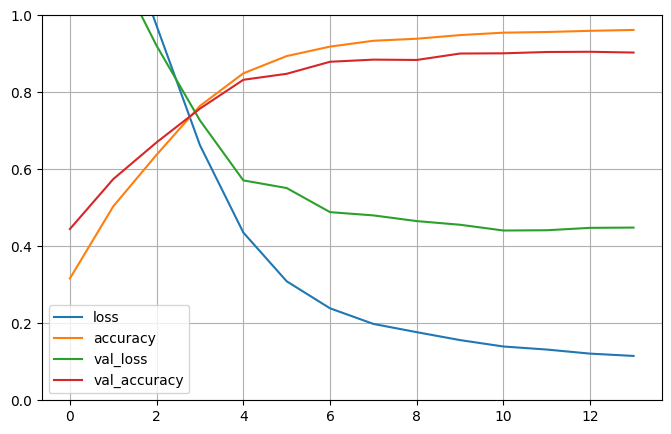

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save("duygumodel.h5")